In [1]:
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

# import pmdarima as pm
# from pmdarima.arima import auto_arima

# import statsmodels.tsa.api as smt
# import statsmodels.api as sm
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.stattools import acf, adfuller, grangercausalitytests
# import statsmodels.tsa.vector_ar.vecm as vecm
# from statsmodels.tsa.api import SARIMAX

# from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# from sklearn.decomposition import PCA

import holidays
# Select country
us_holidays = holidays.US()

from pylab import rcParams
import warnings
rcParams['figure.figsize'] = 18, 8
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
home_dataset= pd.read_csv('/Users/vibhu_goel/Documents/Thesis/data/HomeC.csv')
home_dataset.shape

/var/folders/5j/rdrh_7zd3vxb2603cjtgfwnc0000gn/T/ipykernel_79921/129765037.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  home_dataset= pd.read_csv('/Users/vibhu_goel/Documents/Thesis/data/HomeC.csv')


(503911, 32)

In [3]:
home_dataset[home_dataset.isnull().any(axis=1)]

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
home_dataset.dropna(inplace=True)

In [5]:
home_dataset.tail(2)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503908,1452128308,1.97820,0.003217,1.97820,0.00005,0.495667,0.620367,0.0421,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.99095,0.003233,1.99095,0.00005,0.494700,0.634133,0.0421,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [6]:
home_dataset.columns.tolist()

['time',
 'use [kW]',
 'gen [kW]',
 'House overall [kW]',
 'Dishwasher [kW]',
 'Furnace 1 [kW]',
 'Furnace 2 [kW]',
 'Home office [kW]',
 'Fridge [kW]',
 'Wine cellar [kW]',
 'Garage door [kW]',
 'Kitchen 12 [kW]',
 'Kitchen 14 [kW]',
 'Kitchen 38 [kW]',
 'Barn [kW]',
 'Well [kW]',
 'Microwave [kW]',
 'Living room [kW]',
 'Solar [kW]',
 'temperature',
 'icon',
 'humidity',
 'visibility',
 'summary',
 'apparentTemperature',
 'pressure',
 'windSpeed',
 'cloudCover',
 'windBearing',
 'precipIntensity',
 'dewPoint',
 'precipProbability']

In [7]:
home_dataset.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [8]:
display(home_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]            5

None

In [9]:
##transform the time column using time zone EST

def get_df_index(df, h=0, freq='1T'):
    """
    Get the date/time range of the dataset from UNIX timestamps
    
    df: The dataset containing the data
    h: the hours difference from UTC
    frequency: the frequency of the measurements
    """
    start_time = datetime.fromtimestamp(int(df['time'].iloc[0]), timezone(timedelta(hours=h))).strftime('%Y-%m-%d %H:%M')
    end_time = datetime.fromtimestamp(int(df['time'].iloc[-1]), timezone(timedelta(hours=h))).strftime('%Y-%m-%d %H:%M')
    minute_index = pd.date_range(start_time, periods=len(home_dataset), freq=freq) # instruction say frequency is 1 minute
    return minute_index

minute_index = get_df_index(home_dataset, h=-5, freq='1T')

home_dataset = home_dataset.set_index(minute_index)
home_dataset.index.name= 'date'

In [10]:
home_dataset.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [11]:
cls=[ 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]']

home_dataset[cls].sum(axis=1).head()

date
2016-01-01 00:00:00    0.708017
2016-01-01 00:01:00    0.711500
2016-01-01 00:02:00    0.711550
2016-01-01 00:03:00    0.803983
2016-01-01 00:04:00    0.929017
Freq: T, dtype: float64

In [12]:
home_dataset['use [kW]'].head()

date
2016-01-01 00:00:00    0.932833
2016-01-01 00:01:00    0.934333
2016-01-01 00:02:00    0.931817
2016-01-01 00:03:00    1.022050
2016-01-01 00:04:00    1.139400
Freq: T, Name: use [kW], dtype: float64

In [13]:
home_dataset['gen [kW]'].head()

date
2016-01-01 00:00:00    0.003483
2016-01-01 00:01:00    0.003467
2016-01-01 00:02:00    0.003467
2016-01-01 00:03:00    0.003483
2016-01-01 00:04:00    0.003467
Freq: T, Name: gen [kW], dtype: float64

In [14]:
home_dataset['House overall [kW]'].head()

date
2016-01-01 00:00:00    0.932833
2016-01-01 00:01:00    0.934333
2016-01-01 00:02:00    0.931817
2016-01-01 00:03:00    1.022050
2016-01-01 00:04:00    1.139400
Freq: T, Name: House overall [kW], dtype: float64

In [15]:
home_dataset[['House overall [kW]','temperature']].corr()

,House overall [kW],temperature
House overall [kW],1.000000,0.010379
temperature,0.010379,1.000000


In [16]:
home_dataset.head(3)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 00:01:00,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 00:02:00,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [17]:
obj_cols = ['icon', 'summary', 'cloudCover']
for i in obj_cols:
    print(f'{i} takes the following unique values {home_dataset[i].unique().tolist()}')

icon takes the following unique values ['clear-night', 'partly-cloudy-night', 'clear-day', 'cloudy', 'partly-cloudy-day', 'rain', 'snow', 'wind', 'fog']
summary takes the following unique values ['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle', 'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow', 'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy', 'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry', 'Heavy Snow']
cloudCover takes the following unique values ['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19', '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17', '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06', '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39', '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24', '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09, 0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14, 0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 

In [18]:
len(home_dataset[home_dataset['cloudCover'] == 'cloudCover'])

58

In [19]:
print (home_dataset[home_dataset['cloudCover']=='cloudCover'].index)

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:01:00',
               '2016-01-01 00:02:00', '2016-01-01 00:03:00',
               '2016-01-01 00:04:00', '2016-01-01 00:05:00',
               '2016-01-01 00:06:00', '2016-01-01 00:07:00',
               '2016-01-01 00:08:00', '2016-01-01 00:09:00',
               '2016-01-01 00:10:00', '2016-01-01 00:11:00',
               '2016-01-01 00:12:00', '2016-01-01 00:13:00',
               '2016-01-01 00:14:00', '2016-01-01 00:15:00',
               '2016-01-01 00:16:00', '2016-01-01 00:17:00',
               '2016-01-01 00:18:00', '2016-01-01 00:19:00',
               '2016-01-01 00:20:00', '2016-01-01 00:21:00',
               '2016-01-01 00:22:00', '2016-01-01 00:23:00',
               '2016-01-01 00:24:00', '2016-01-01 00:25:00',
               '2016-01-01 00:26:00', '2016-01-01 00:27:00',
               '2016-01-01 00:28:00', '2016-01-01 00:29:00',
               '2016-01-01 00:30:00', '2016-01-01 00:31:00',
               '2016-01-

In [20]:
home_dataset['cloudCover'].replace('cloudCover', np.nan, inplace=True)
home_dataset['cloudCover'].fillna(method='bfill', inplace=True)
home_dataset['cloudCover'] = home_dataset['cloudCover'].astype('float')

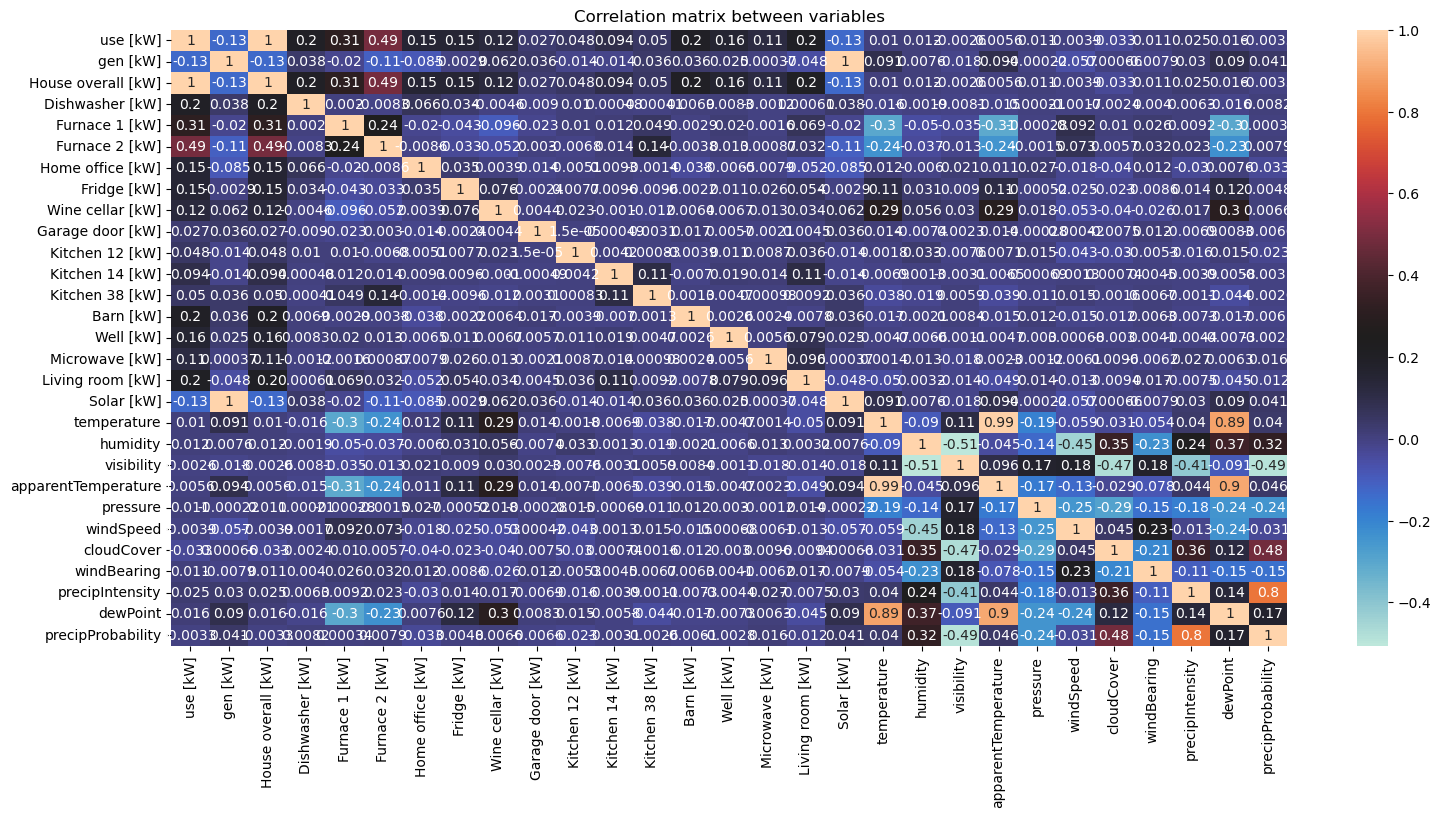

In [21]:
continues_features = home_dataset.select_dtypes(include=np.number).columns
plt.figure()
sns.heatmap(home_dataset[continues_features].corr(), annot=True, cmap='icefire').set_title('Correlation plot')
plt.title('Correlation matrix between variables')
plt.show()

In [22]:
home_dataset[['use [kW]','House overall [kW]','gen [kW]','Solar [kW]','temperature','apparentTemperature','dewPoint']].corr()

,use [kW],House overall [kW],gen [kW],Solar [kW],temperature,apparentTemperature,dewPoint
use [kW],1.000000,1.000000,-0.131635,-0.131635,0.010379,0.005560,0.016040
House overall [kW],1.000000,1.000000,-0.131635,-0.131635,0.010379,0.005560,0.016040
gen [kW],-0.131635,-0.131635,1.000000,1.000000,0.090983,0.093793,0.089664
Solar [kW],-0.131635,-0.131635,1.000000,1.000000,0.090983,0.093793,0.089664
temperature,0.010379,0.010379,0.090983,0.090983,1.000000,0.993185,0.889481
apparentTemperature,0.005560,0.005560,0.093793,0.093793,0.993185,1.000000,0.900818
dewPoint,0.016040,0.016040,0.089664,0.089664,0.889481,0.900818,1.000000


In [23]:
home_dataset.drop('House overall [kW]', axis=1, inplace=True)
home_dataset.drop('Solar [kW]', axis=1, inplace=True)
home_dataset.drop('apparentTemperature', axis=1, inplace=True)
home_dataset.drop('dewPoint', axis=1, inplace=True)

In [24]:
home_dataset['Furnace'] = home_dataset['Furnace 1 [kW]'] + home_dataset['Furnace 2 [kW]']
home_dataset['Kitchen'] = home_dataset['Kitchen 12 [kW]'] + home_dataset['Kitchen 14 [kW]'] + home_dataset['Kitchen 38 [kW]']
home_dataset.drop(['time', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]',
                    'precipProbability'], axis =1, inplace=True)

In [25]:
home_dataset.columns

Index(['use [kW]', 'gen [kW]', 'Dishwasher [kW]', 'Home office [kW]',
       'Fridge [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]',
       'Well [kW]', 'Microwave [kW]', 'Living room [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'Furnace', 'Kitchen'],
      dtype='object')

In [26]:
home_dataset.head()

,use [kW],gen [kW],Dishwasher [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Barn [kW],Well [kW],Microwave [kW],...,humidity,visibility,summary,pressure,windSpeed,cloudCover,windBearing,precipIntensity,Furnace,Kitchen
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.082617,0.000567
2016-01-01 00:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.084533,0.000567
2016-01-01 00:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.083017,0.000617
2016-01-01 00:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.175417,0.000650
2016-01-01 00:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,0.62,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.300917,0.000783


In [27]:
# Cosmetic change: update column names
cols_names = {
    'use [kW]': 'Consumed energy', 
    'gen [kW]': 'Generated energy',
    'temperature': 'Temperature',
    'icon': 'Icon',
    'humidity': 'Humidity',
    'visibility': 'Visibility',
    'summary': 'Summary',
    'pressure': 'Pressure',
    'windSpeed': 'Wind speed',
    'cloudCover': 'Cloud cover',
    'windBearing': 'Wind bearing', 
    'precipIntensity': 'Percipitation intensity',
    # 'dewPoint': 'Dew point',
    # 'precipProbability': 'Percipitation probability'
}

home_dataset.rename(columns=cols_names, inplace=True)
cols_tmp = {k:k.replace(' [kW]','') if ' [kW]' in k else k for k in list(home_dataset.columns)}
home_dataset.rename(columns=cols_tmp, inplace=True)

# Group columns by content and type
energy_consumption_cols = ['Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen']

energy_generation_cols = []

weather_cols_cont = ['Temperature', 'Humidity', 'Visibility', 'Pressure', 'Wind speed',
    'Wind bearing', 'Percipitation intensity', 'Cloud cover'] #'Dew point',  'Percipitation probability',

weather_cols_cat = ['Summary']


# Create column for Sum of individual consumption
tmp = energy_consumption_cols.copy()
# tmp.remove('Consumed energy')
home_dataset["total_house_usage"] = home_dataset[tmp].sum(axis=1)

energy_consumption_cols = energy_consumption_cols + ["total_house_usage"]
# del tmp
home_dataset.drop(['Consumed energy', 'Generated energy'], axis =1, inplace=True)

home_dataset.head()

,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Temperature,...,Visibility,Summary,Pressure,Wind speed,Cloud cover,Wind bearing,Percipitation intensity,Furnace,Kitchen,total_house_usage
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,36.14,...,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.082617,0.000567,0.708017
2016-01-01 00:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,36.14,...,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.084533,0.000567,0.711500
2016-01-01 00:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,36.14,...,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.083017,0.000617,0.711550
2016-01-01 00:03:00,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,36.14,...,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.175417,0.000650,0.803983
2016-01-01 00:04:00,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,36.14,...,10.0,Clear,1016.91,9.18,0.75,282.0,0.0,0.300917,0.000783,0.929017


In [28]:
home_dataset.columns

Index(['Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Barn', 'Well', 'Microwave', 'Living room', 'Temperature', 'Icon',
       'Humidity', 'Visibility', 'Summary', 'Pressure', 'Wind speed',
       'Cloud cover', 'Wind bearing', 'Percipitation intensity', 'Furnace',
       'Kitchen', 'total_house_usage'],
      dtype='object')

In [29]:
def resample_dataframe(df, energy_consumption_cols, energy_generation_cols, weather_cols_cont, weather_cols_cat, freq):
    """
    Resample dataframe to appropriate frequency
    
    df: The dataframe containing the data we want to resample
    energy_consumption_cols: the columns containing variables related to energy consumption
    energy_generation_cols: the columns containing variables related to energy generation
    weather_cols_cont: the columns containing continuous weather variables
    weather_cols_cat: the columns containing categorical weather variables
    freq: the resampling frequency
    """
    energy_tmp = energy_consumption_cols + energy_generation_cols
    
    # Energy is summed up (total energy per day)
    home_dataset_energy_day = df[energy_tmp].resample(freq, closed='left', label='left').sum()

    # Weather information is averaged/we keep the most common
    home_dataset_weather_day_cont = df[weather_cols_cont].resample(freq, closed='left', label='left').mean()
    home_dataset_weather_day_cat = df[weather_cols_cat].resample(freq, closed='left', label='left').apply(lambda x: x.value_counts().idxmax())

    home_dataset_day = pd.concat([home_dataset_energy_day, home_dataset_weather_day_cont, home_dataset_weather_day_cat], axis=1)
    return home_dataset_day

home_dataset_day = resample_dataframe(home_dataset, energy_consumption_cols, energy_generation_cols, weather_cols_cont, weather_cols_cat, '1d')
time_index = home_dataset_day.index
num_days = time_index.shape[0]
print(f'Number of days is {num_days}')

display(home_dataset_day.head())

Number of days is 350


,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,...,total_house_usage,Temperature,Humidity,Visibility,Pressure,Wind speed,Wind bearing,Percipitation intensity,Cloud cover,Summary
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,90.702557,144.769717,111.682933,31.257550,19.048300,111.661367,35.580433,18.318750,99.103450,594.067950,...,1274.225161,34.778278,0.631417,9.774444,1014.571431,7.473833,265.534722,0.000089,0.572500,Clear
2016-01-02,85.025519,155.771717,94.898667,24.075917,19.220983,185.617650,34.463667,8.947350,73.505583,651.612200,...,1348.993491,31.892111,0.573403,9.988722,1014.266569,7.854611,253.373611,0.000000,0.266208,Clear
2016-01-03,52.463271,194.758500,72.527317,32.892950,19.554350,146.753567,34.488367,24.122217,29.408333,613.224833,...,1239.120974,32.867292,0.646222,9.935014,1009.118792,7.565542,236.936111,0.000000,0.141875,Clear
2016-01-04,79.997807,162.271567,86.542233,31.016717,19.139667,46.427067,40.868750,19.028783,83.001900,702.221933,...,1287.697179,17.488222,0.560111,9.870042,1020.457903,12.302556,311.866667,0.000000,0.130528,Clear
2016-01-05,51.867489,146.072683,62.283900,20.896983,20.142317,49.163717,16.016833,12.249067,44.016467,801.542000,...,1232.771560,12.437458,0.573222,9.986958,1035.298125,4.856056,293.073611,0.000000,0.002167,Clear


In [30]:
home_dataset_day.columns

Index(['Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Barn', 'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen',
       'total_house_usage', 'Temperature', 'Humidity', 'Visibility',
       'Pressure', 'Wind speed', 'Wind bearing', 'Percipitation intensity',
       'Cloud cover', 'Summary'],
      dtype='object')

In [31]:
home_dataset_day['Month'] = home_dataset_day.index.month
home_dataset_day['Day'] = home_dataset_day.index.day
home_dataset_day['Weekday'] = home_dataset_day.index.day_name()
home_dataset_day['is_weekend'] = home_dataset_day['Weekday'].map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
home_dataset_day['Quarter'] = home_dataset_day.index.quarter

home_dataset_day[["movave_7", "movstd_7"]] = home_dataset_day['total_house_usage'].rolling(7).agg([np.mean, np.std])
home_dataset_day[["movave_30", "movstd_30"]] = home_dataset_day['total_house_usage'].rolling(30).agg([np.mean, np.std])
home_dataset_day[["movave_90", "movstd_90"]] = home_dataset_day['total_house_usage'].rolling(90).agg([np.mean, np.std])
home_dataset_day[["movave_365", "movstd_365"]] = home_dataset_day['total_house_usage'].rolling(365).agg([np.mean, np.std])


In [32]:
def calculate_season(month):
  """Calculates the USA season for a given date index.

  Args:
    month: month.

  Returns:
    A string representing the season, or None if the date index is outside of the
    USA season range.
  """

  season = None

  # Check the month and assign the corresponding season.
  if month in [3, 4, 5]:
    season = "Spring"
  elif month in [6, 7, 8]:
    season = "Summer"
  elif month in [9, 10, 11]:
    season = "Fall"
  elif month in [12, 1, 2]:
    season = "Winter"

  return season

In [33]:
home_dataset_day['Season']= home_dataset_day['Month'].map(lambda x: calculate_season(x))

In [34]:
home_dataset_day['Season'].value_counts(dropna=False)

Season
Spring    92
Summer    92
Fall      91
Winter    75
Name: count, dtype: int64

In [35]:
home_dataset_day['Appliances']= home_dataset_day[['Dishwasher','Fridge','Garage door','Microwave','Furnace']].sum(axis=1)

In [36]:
home_dataset_day.head(2)

,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,...,movave_7,movstd_7,movave_30,movstd_30,movave_90,movstd_90,movave_365,movstd_365,Season,Appliances
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,90.702557,144.769717,111.682933,31.257550,19.048300,111.661367,35.580433,18.31875,99.103450,594.06795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,833.820490
2016-01-02,85.025519,155.771717,94.898667,24.075917,19.220983,185.617650,34.463667,8.94735,73.505583,651.61220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,859.704719


In [37]:
home_dataset_day['is_holiday'] = home_dataset_day.index.map(lambda x: 1 if str(x) in us_holidays else 0)

In [38]:
home_dataset_day['is_holiday'].value_counts(dropna=False)

is_holiday
0    341
1      9
Name: count, dtype: int64

In [39]:
home_dataset_day.columns

Index(['Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Barn', 'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen',
       'total_house_usage', 'Temperature', 'Humidity', 'Visibility',
       'Pressure', 'Wind speed', 'Wind bearing', 'Percipitation intensity',
       'Cloud cover', 'Summary', 'Month', 'Day', 'Weekday', 'is_weekend',
       'Quarter', 'movave_7', 'movstd_7', 'movave_30', 'movstd_30',
       'movave_90', 'movstd_90', 'movave_365', 'movstd_365', 'Season',
       'Appliances', 'is_holiday'],
      dtype='object')

In [40]:
# home_dataset_day.to_csv('/Users/vibhu_goel/Documents/Thesis/data/HomeC_cleaned.csv')